![This is an image](Quant-Trading.jpg)

<font size="3">
Please visit our website <a href="https://www.quant-trading.co" target="_blank">quant-trading.co</a> for more tools on quantitative finance and data science.
</font>

# **PRINCIPAL COMPONENT ANALYSIS FOR INTEREST RATES**

## **¿How do you apply PCA for interest rates and bond yields?**

<font size="3"> Principal component analysis (PCA) is a multivariate statistical technique generally used to reduce the dimensionality of a data set. This technique can also be seen as a method to transform correlated variables into uncorrelated one. In this notebook we are going to explain the concept of Principal Component Analysis, how to calculate it and we will show an example for the interest rate curve in the United States, particularly using the treasury yield curve.<br><br>
    
<font size="3"> PCA makes use of the variance and covariance matrix of the data set. If this set is composed of p variables, then we would need p components to explain the total variance of the system. However, it is possible to use k components (with k<p) to explain a large portion of the total variance. This last fact is what helps us reduce the dimensionality of the system. <br><br>

## **First thing to do: Import all the required libraries**

<font size="3"> Here we will be using libraries such as pandas or numpy for calculations. We will also use matplotlib to make charts. We will use pandas_datareader to download data from the FRED API. If you would like to know how to do that, please take a look at our <a href="https://quant-trading.co/how-to-download-data-from-federal-reserve-fred-api/" target="_blank">notebook</a> on downloading economic and financial Data from FRED, the FED of St Louis. We also need libraries such as sklearn or scipy.optimize for more advanced calculations<br><br>  

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.font_manager as font_manager
from matplotlib.ticker import FormatStrFormatter
import matplotlib.dates as mdates
formatter = mdates.DateFormatter("%Y-%m-%d")
import sklearn
from sklearn import decomposition
from sklearn import datasets
import datetime
import pandas_datareader.data as web
from math import pi, cos, sin
from scipy.optimize import minimize

## **Download yield from treasury bonds**

<font size="3">We need to download data for treasury bonds with different maturities. Fortunately, we can find series of constant maturity treasuries on FRED. That would be a theoretical yield, since all the treasuries mature at some point in time, but the Federal Reserve uses a methodology to track the yields of constant maturity bonds. We will get that information from 1 year up to 30 years to maturity using the following script:<br><br>  

In [3]:
#Parámetros de fechas
start = datetime.datetime(1980, 1, 1)
end = datetime.datetime(2024, 10, 31)

#US Treasuries

US_Rates = web.DataReader(['DGS1','DGS2','DGS3','DGS5','DGS7','DGS10','DGS30'], 'fred', start, end)
US_Rates.dropna(inplace=True)
US_Rates.reset_index(inplace=True)
US_Rates.head()

,DATE,DGS1,DGS2,DGS3,DGS5,DGS7,DGS10,DGS30
0,1980-01-02,11.89,11.39,10.77,10.52,10.51,10.50,10.23
1,1980-01-03,12.25,11.45,10.79,10.54,10.59,10.60,10.31
2,1980-01-04,12.25,11.47,10.81,10.62,10.63,10.66,10.34
3,1980-01-07,12.07,11.35,10.72,10.56,10.60,10.63,10.35
4,1980-01-08,11.94,11.26,10.67,10.52,10.55,10.57,10.28


## **Principal Component Analysis example with interest rates**

<font size="3">As we explained before, in the financial markets, PCA is frequently used when analyzing the interest rate curve. The curve is generally composed of different nodes depending on their maturity period. These nodes normally move together and have a high correlation. If we used the nodes for each month up to 1 year and then for each year up to 30 years, we would have a total of 42 nodes. Or in the data we just downloaded we have 7 different maturities. It is clear that modeling such a large number of variables is difficult. However, let's see how using PCA we can reduce this number to just 2 or 3 variables.<br><br> 
    
<font size="3"> An easy way to understand the calculation methodology of the principal component analysis is through a 2-dimensional example. Logically, it does not make much sense to apply this method in 2 dimensions because we will not obtain any benefit in reducing the dimensionality of the system. However, due to its easy graphic representation, the 2-dimensional example can be quite illustrative. In the chart below we can see a dispersion diagram between the rates of the 1 year and 2 year constant maturity treasury bonds in the US.<br><br>
    
<font size="3">As expected, both rates have a high correlation.<br><br> 

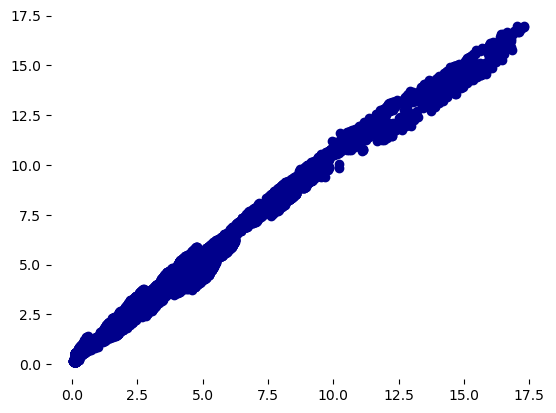

In [4]:
plt.scatter(US_Rates['DGS1'],US_Rates['DGS2'],color='darkblue',marker='o')
plt.box(on=None)
plt.show()

## **Ellipse chart to explain Principal Component Analysis**

<font size="3">The ellipse drawn in royalblue covers almost the entire cloud of points corresponding to the data set. Y1 and Y2 are the eigenvectors associated with this data and can be interpreted as rotated coordinate axes. There we can observe that these two vectors are perpendicular. This is equivalent to saying that the vectors are orthogonal and therefore are not correlated. The size of each eigenvector is known as its eigenvalue.<br><br> 

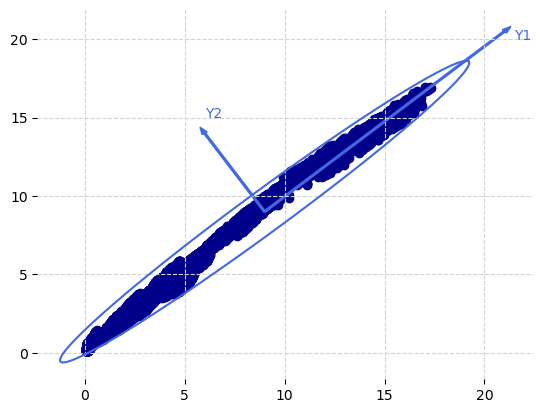

In [5]:
u=9.0                #x-position of the center
v=9.0                #y-position of the center
a=14.0               #radius on the x-axis
b=1.2                #radius on the y-axis
t_rot=pi*0.24        #rotation angle

t = np.linspace(0, 2*pi, 100)
Ell = np.array([a*np.cos(t) , b*np.sin(t)])                                   #u,v removed to keep the same center location
R_rot = np.array([[cos(t_rot) , -sin(t_rot)],[sin(t_rot) , cos(t_rot)]])      #2-D rotation matrix

Ell_rot = np.zeros((2,Ell.shape[1]))
for i in range(Ell.shape[1]):
    Ell_rot[:,i] = np.dot(R_rot,Ell[:,i])


plt.scatter(US_Rates['DGS1'],US_Rates['DGS2'],color='darkblue',marker='o')
plt.plot( u+Ell_rot[0,:] , v+Ell_rot[1,:],'royalblue')    #rotated ellipse
plt.grid(color='lightgray',linestyle='--')
plt.arrow(9,9,12,11.5,width=0.1,color='royalblue')
plt.arrow(9,9,-3,5,width=0.1,color='royalblue')
plt.text(21.5,20,'Y1',color='royalblue')
plt.text(6,15,'Y2',color='royalblue')
plt.box(on=None)
plt.show()

<font size="3">Y1 and Y2 are in this case the principal components of the data set. Normally the principal components are ordered from largest to smallest according to the magnitudes of their eigenvalues, that is, their variability. In this case Y1 would be the first principal component since it has the greatest variability. The analysis can be extended to p dimensions. For example, in the case of p=3 we would not be talking about an ellipse but rather a 3-dimensional ellipsoid (like an American football).<br><br> 

## **Rotation of the data to visualize PCA**

<font size="3">We can rotate the data using some linear algebra calculations. In the next steps we will illustrate this step-by-step. We want to make a linear transformation of the following type: Y = A'X . In this case, we will be working with a A matrix with 2x2 dimension. Hence, our matrix X will be a 2xn matrix and in this case will correspond to the 1 year and 2 year constant maturity treasury yields. Rows will be 1 and 2 years and columns will be the observations:  <br><br>  

## **Step 1**

<font size="3">Define the X matrix<br><br>  

In [6]:
US_Rates_2x2_matrix = np.array(US_Rates[['DGS1','DGS2']].T)
US_Rates_2x2_matrix

array([[11.89, 12.25, 12.25, ...,  3.92,  3.91,  3.88],
       [11.39, 11.45, 11.47, ...,  3.55,  3.57,  3.49]])

<font size="3">Look that our matrix X has indeed a 2 x n shape  <br><br>  

In [7]:
US_Rates_2x2_matrix.shape

(2, 11185)

## **Step 2**

<font size="3">Initialize the A matrix as a unit matrix. We will later modified its elements. The goal is to find an A matrix which is orthogonal. This matrix should also satisfy A'A = I, which is the identity matrix.<br><br> 

In [9]:
A_2x2_matrix_T = np.ones([2, 2])
A_2x2_matrix_T

array([[1., 1.],
       [1., 1.]])

## **Step 3**

<font size="3">Calculate the covariance matrix of X. We will call it Σ. This is also a 2x2 matrix. The covariance matrix of Y will be A'ΣA. Moreover, we know that Σ has a spectral decomposition of the form Σ = AΛA'. Thus, we can write A'ΣA = A'AΛA'A = Λ . Principal Component Decomposition is a special case of the spectral decomposition, where we are looking for the vectors in matrix Y to have the maximum variance. Moreover, they should be linearly independent. Therefore, the covariance matrix of Y will be a diagonal matrix, with its components equal to the eigenvalues squared. This means, we get variances. Each vector in Y, Y1 and Y2 are called principal components and the coeficients of matrix A, are called loads. <br><br> 

In [10]:
cov_matrix = np.cov(US_Rates_2x2_matrix)
cov_matrix

array([[13.91720337, 13.86969358],
       [13.86969358, 13.94506828]])

## **Step 4**

<font size="3">We need to find the elements in A for the variances to be as big as possible. However, to get a number we need to put a restriction, which is that the multiplication of each vector with itself transposed should be equal to 1. Another restriction is between vector 1 and vector 2, since they should be orthogonal. In other words, their multiplication should equal zero. Below we show the calculations we need for each case. We won't get those numbers yet, since we need to performn an optimization procedure. <br><br> 

In [11]:
#This is the way to calculate the variance of the first element
variance1 = (A_2x2_matrix_T[0].dot(cov_matrix)).dot(A_2x2_matrix_T[0].T)
variance1

55.6016588147382

In [12]:
#This is the way to calculate the variance of the second element
variance2 = (A_2x2_matrix_T[1].dot(cov_matrix)).dot(A_2x2_matrix_T[1].T)
variance2

55.6016588147382

In [13]:
#This is the way to put a constraint for the variance of the first element
constraint1 = A_2x2_matrix_T[0].dot(A_2x2_matrix_T[0].T)
constraint1

2.0

In [14]:
#This is the way to put a constraint for the variance of the second element
constraint2 = A_2x2_matrix_T[1].dot(A_2x2_matrix_T[1].T)
constraint2

2.0

In [15]:
#This is the way to put a constraint for the vectors to be orthogonal
constraint3 = A_2x2_matrix_T[0].dot(A_2x2_matrix_T[1].T)
constraint3

2.0

## **Step 5**

<font size="3">We need the variance of the first element to be as big as possible. For us to do that, we need to create a function as is shown below. The we calculate the multiplication of the vector with the covariance matrix and then with the same vector transposed. The function returns the negative of that number because we are going to use the minimum method for the optimization procedure.<br><br> 

In [16]:
def my_function(elements):
    
    my_calculation = (elements.dot(cov_matrix)).dot(elements.T)
    
    return -my_calculation

my_function(A_2x2_matrix_T[0])

-55.6016588147382

In [17]:
#This is the vector we are going to use as the initial value
A_2x2_matrix_T[0]

array([1., 1.])

<font size="3">For the minimization we are using the minimize method in the scipy.optimize library. You can see an example on how to perform that kind of calculations. We need to write the restrictions. In this first case, the only restriction will be that the multiplication of the vector with itself transposed equals one. In this case the restriction is written as 1 minus the dot product to indicate it should equal 1. Some of the parameters of the minimize method are the function we are using, the initial value, the optimization method or the constrains as you can observe below: <br><br> 

In [18]:
initial_elements1 = A_2x2_matrix_T[0]

opt_constraints = ({'type': 'eq',
                        'fun': lambda initial_elements: 1.0 - initial_elements.dot(initial_elements.T)}
                   )


optimal_elements1 = minimize(my_function, 
                           initial_elements1,                             
                            method='SLSQP',                            
                            constraints=opt_constraints
                            )


print(optimal_elements1)

     fun: -27.800836740235475
     jac: array([-39.29656839, -39.33606243])
 message: 'Optimization terminated successfully'
    nfev: 15
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.70675154, 0.70746185])


<font size="3">From the optimization procedure we get our first vector<br><br> 

In [19]:
optimal_elements1.x

array([0.70675154, 0.70746185])

<font size="3">we can check the dot product of the vector with itself transposed equals 1.<br><br> 

In [20]:
np.round(optimal_elements1.x.dot(optimal_elements1.x.T),2)

1.0

## **Step 6**

<font size="3">We need the variance of the second element to be as big as possible as well. We repeat the same procedure as before but we also add the restriction that these new vector should be orthogonal to the one we found before. This is, the dot product of those 2 vectors should equal zero.<br><br> 

In [21]:
initial_elements2 = A_2x2_matrix_T[0]


opt_constraints = ({'type': 'eq', 'fun': lambda initial_elements2: 1.0 - initial_elements2.dot(initial_elements2.T)},
                   {'type': 'eq', 'fun': lambda initial_elements2: 0.0 - optimal_elements1.x.dot(initial_elements2.T)}
                   )



optimal_elements2 = minimize(my_function, 
                           initial_elements2,                             
                            method='SLSQP',                            
                            constraints=opt_constraints
                            )


print(optimal_elements2)

     fun: -0.061435256537384055
     jac: array([-0.08692669,  0.08683842])
 message: 'Optimization terminated successfully'
    nfev: 57
     nit: 12
    njev: 12
  status: 0
 success: True
       x: array([ 0.70746188, -0.70675157])


In [22]:
#Satisfies first restriction
np.round(optimal_elements2.x.dot(optimal_elements2.x.T),2)

1.0

In [23]:
#Satisfies second restriction
np.round(optimal_elements1.x.dot(optimal_elements2.x.T),2)

0.0

## **We have the A matrix for the Principal Component Analysis**

<font size="3">We assign each of those numbers to our A matrix. Recall that the elements of A matriz are called loads.<br><br> 

In [24]:
A_2x2_matrix_T[0][0] = optimal_elements1.x[0]
A_2x2_matrix_T[0][1] = optimal_elements1.x[1]
A_2x2_matrix_T[1][0] = optimal_elements2.x[0]
A_2x2_matrix_T[1][1] = optimal_elements2.x[1]
A_2x2_matrix_T

array([[ 0.70675154,  0.70746185],
       [ 0.70746188, -0.70675157]])

<font size="3">We can indeed check that the multiplication of A'A is the identity matrix.<br><br> 

In [25]:
np.round(A_2x2_matrix_T.dot(A_2x2_matrix_T.T),2)

array([[1., 0.],
       [0., 1.]])

## **Calculate the rotated matrix Y**

<font size="3">If we multiply A'X we get Y, which is the rotated matrix X. We can observe that below, both numerically and graphically<br><br> 

In [26]:
US_Rates_2x2_rotated_matrix = A_2x2_matrix_T.dot(US_Rates_2x2_matrix)
US_Rates_2x2_rotated_matrix

array([[16.46126631, 16.75814457, 16.77229381, ...,  5.28195561,
         5.28903733,  5.21123784],
       [ 0.36182145,  0.57410263,  0.5599676 , ...,  0.26428252,
         0.24307287,  0.27838914]])

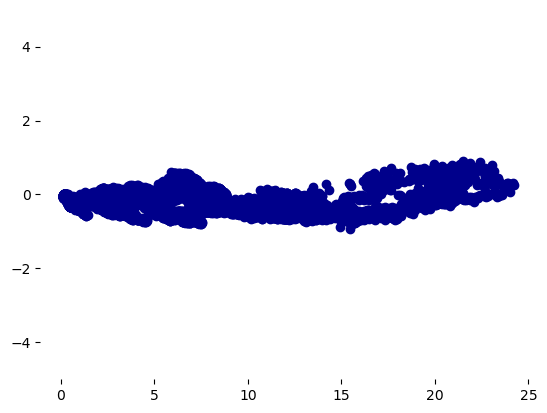

In [27]:
plt.scatter(US_Rates_2x2_rotated_matrix[0],US_Rates_2x2_rotated_matrix[1],color='darkblue',marker='o')
plt.axis([None, None, -5, 5])
plt.box(on=None)
plt.show()
#You can see that the data are across the traditional X and Y axis

## **Compare the original and the rotated data X and Y**

<font size="3">Below you can find a plot of the data<br><br> 

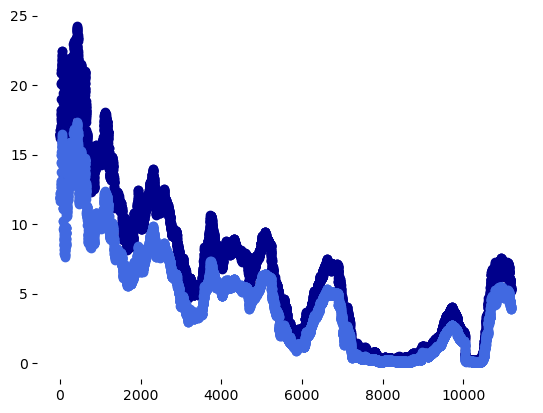

In [28]:
plt.plot(US_Rates_2x2_rotated_matrix[0],color='darkblue',marker='o')
plt.plot(US_Rates_2x2_matrix[0],color='royalblue',marker='o')
plt.axis([None, None, None, None])
plt.box(on=None)
plt.show()

## **Principal Component Analysis for interest rates**

<font size="3">We have illustrated the calculations you need to do to get the principal component for a n=2 dimension. That was a trivial case, since we don't need a PCA in that situation. However, it shows the procedure you need to follow to get more dimentions. It is basically the same. You target for the greatest possible variance and then make sure all the vectors are orthogonal. Fortunately, different python packages deal with those calculations easily. In particular, sklearn has a method called decomposition that allows us to perform the calculations. Below we show an example getting 7 components, which is the same number of nodes of the treasury curve we downloaded from FRED. Check below how to do that:<br><br> 

In [30]:
pca = decomposition.PCA(n_components=7)
matrix_A = pca.fit(US_Rates[['DGS1','DGS2','DGS3','DGS5','DGS7','DGS10','DGS30']]).components_
matrix_A

array([[ 0.39827706,  0.40336297,  0.39802578,  0.38462245,  0.37255643,
         0.3588379 ,  0.32365385],
       [ 0.58501538,  0.34114277,  0.17149733, -0.0911351 , -0.2447838 ,
        -0.37398505, -0.55125107],
       [ 0.58677465, -0.13054982, -0.37909314, -0.36862344, -0.24480778,
         0.07684909,  0.54149864],
       [ 0.3503985 , -0.48087172, -0.36120877,  0.24648691,  0.3629605 ,
         0.32915047, -0.46333071],
       [ 0.1296353 , -0.32497006,  0.0013348 ,  0.53383493,  0.09254242,
        -0.7079532 ,  0.28782946],
       [ 0.04283441, -0.32910832,  0.33021513,  0.3697223 , -0.72909127,
         0.33487417, -0.02003805],
       [-0.1157959 ,  0.50864647, -0.65493278,  0.47481219, -0.26357776,
         0.06153278, -0.01506641]])

In [31]:
#The shape of the A matrix is 7x7
matrix_A.shape

(7, 7)

## **Explained variance ratio**

<font size="3">Please remember that PCA is a dimensionality reduction technique. Most of the variance of a system is usually explained by a few principal components. In this case the first PC explains 98.4% of the total variance, huge!<br><br> 

In [32]:
np.round(pca.explained_variance_ratio_,3)

array([0.984, 0.015, 0.001, 0.   , 0.   , 0.   , 0.   ])

In [33]:
#Singular values
np.round(pca.singular_values_,2)

array([973.57, 121.04,  28.16,   9.15,   5.36,   4.18,   3.24])

## **Interpretation of the loads in A matrix**

<font size="3">We can plot the load of the first vectors of the A matrix. Below you can observe the first one. You can see that all the element have a value close to 0.4. Since all the loads have similar values, people usually say that the first principal component of the yield curve, resembles a parallel move. <br><br> 

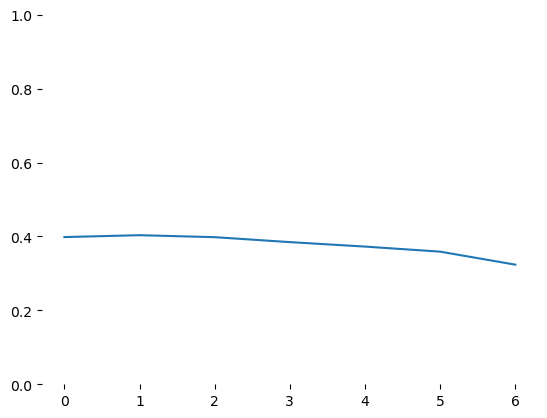

In [34]:
plt.plot(matrix_A[0])
plt.axis([None, None, 0, 1])
plt.box(on=None)
plt.show()

<font size="3">The second principal component is associated with yield curve twist movements. That means steepening or flattening moves. This is when the short end rates move in a different direction or magnitude than long end rates.<br><br> 

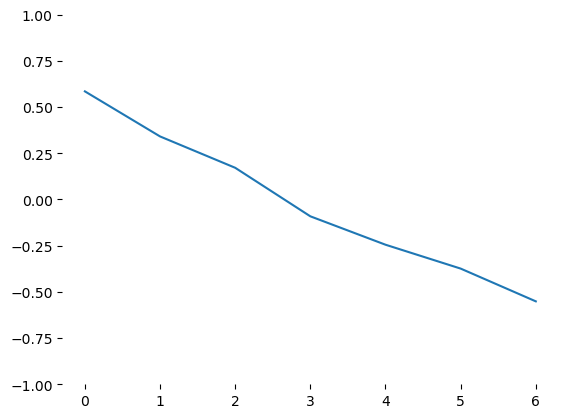

In [35]:
plt.plot(matrix_A[1])
plt.axis([None, None, -1, 1])
plt.box(on=None)
plt.show()

<font size="3">The third principal component is associated with butterfly moves. This mean when short and long end rates move similarly, but rates in the belly of the curve move differently.<br><br> 

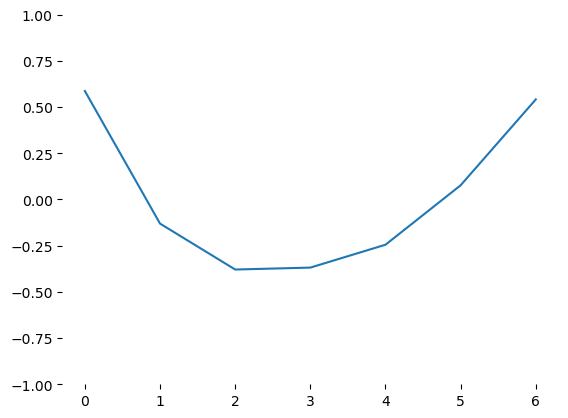

In [36]:
plt.plot(matrix_A[2])
plt.axis([None, None, -1, 1])
plt.box(on=None)
plt.show()

<font size="3">From the analysis above we noted that using the first 3 principal components should be enough for the analysis. We will do that below<br><br> 

In [37]:
pca = decomposition.PCA(n_components=3)
pca.fit(US_Rates[['DGS1','DGS2','DGS3','DGS5','DGS7','DGS10','DGS30']])
pca.components_

array([[ 0.39827706,  0.40336297,  0.39802578,  0.38462245,  0.37255643,
         0.3588379 ,  0.32365385],
       [ 0.58501538,  0.34114277,  0.17149733, -0.0911351 , -0.2447838 ,
        -0.37398505, -0.55125107],
       [ 0.58677465, -0.13054982, -0.37909314, -0.36862344, -0.24480778,
         0.07684909,  0.54149864]])

<font size="3">Using the function transform we get our Y matrix, which basically is the rotated system. We can watch that information numerically and graphically<br><br> 

In [38]:
US_Rates_rotated = pca.transform(US_Rates[['DGS1','DGS2','DGS3','DGS5','DGS7','DGS10','DGS30']])
US_Rates_rotated_df = pd.DataFrame(US_Rates_rotated)
US_Rates_rotated_df

,0,1,2
0,14.938164,1.782973,0.721655
1,15.212980,1.914573,0.941527
2,15.305919,1.868767,0.912908
3,15.108221,1.725611,0.889644
4,14.922042,1.687193,0.828537
...,...,...,...
11180,-4.000103,1.535069,0.253588
11181,-3.988478,1.478641,0.258327
11182,-4.016911,1.455276,0.273021
11183,-3.972481,1.429382,0.254716


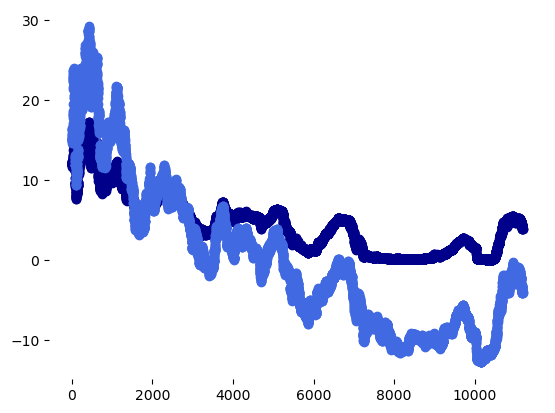

In [39]:
plt.plot(US_Rates['DGS1'],color='darkblue',marker='o')
plt.plot(US_Rates_rotated_df[0],color='royalblue',marker='o')
plt.axis([None, None, None, None])
plt.box(on=None)
plt.show()

## **What is the most important factor for the yield curve?**

<font size="3">The first principal component explains most of the variance of the entire data set of the yield curve. When you are working with fixed income, the most important factor to explain the direction of the rates is inflation. If inflation goes up, rates normally do the same and viceverse. Let's check that below:<br><br> 

In [40]:
df_variables = US_Rates.join(US_Rates_rotated_df)
df_variables

,DATE,DGS1,DGS2,DGS3,DGS5,DGS7,DGS10,DGS30,0,1,2
0,1980-01-02,11.89,11.39,10.77,10.52,10.51,10.50,10.23,14.938164,1.782973,0.721655
1,1980-01-03,12.25,11.45,10.79,10.54,10.59,10.60,10.31,15.212980,1.914573,0.941527
2,1980-01-04,12.25,11.47,10.81,10.62,10.63,10.66,10.34,15.305919,1.868767,0.912908
3,1980-01-07,12.07,11.35,10.72,10.56,10.60,10.63,10.35,15.108221,1.725611,0.889644
4,1980-01-08,11.94,11.26,10.67,10.52,10.55,10.57,10.28,14.922042,1.687193,0.828537
...,...,...,...,...,...,...,...,...,...,...,...
11180,2024-09-18,3.95,3.61,3.49,3.47,3.58,3.70,4.03,-4.000103,1.535069,0.253588
11181,2024-09-19,3.93,3.59,3.47,3.49,3.60,3.73,4.06,-3.988478,1.478641,0.258327
11182,2024-09-20,3.92,3.55,3.46,3.48,3.59,3.73,4.07,-4.016911,1.455276,0.273021
11183,2024-09-23,3.91,3.57,3.47,3.51,3.62,3.75,4.09,-3.972481,1.429382,0.254716


In [41]:
#Inflation expectation - observations and moving average
US_BEI_1Y = web.DataReader('EXPINF1YR', 'fred', start, end)
US_BEI_1Y['MA'] = US_BEI_1Y['EXPINF1YR'].rolling(window=6).mean()

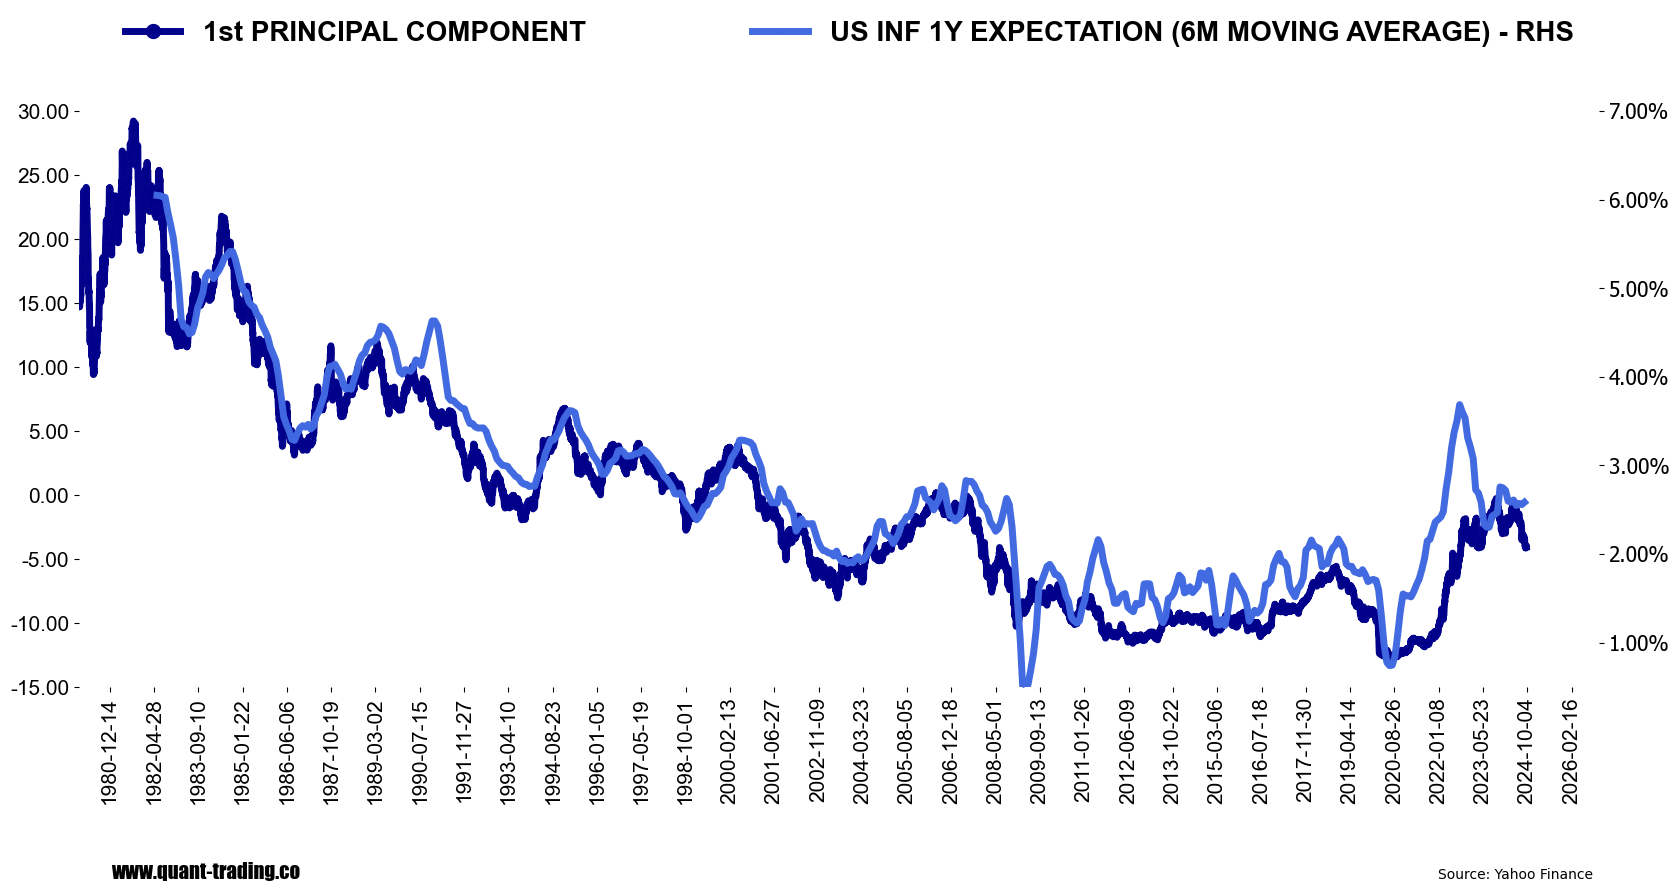

In [42]:
#CHART - ROTATED MATRIX FIRST COLUMN - OFTEN REFERRED TO AS FIRST PRINCIPAL COMPONENT

font = font_manager.FontProperties(family='arial',weight='bold', style='normal', size=20)
tick_spacing = 500
fig = plt.figure()


#SUBPLOT4
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(df_variables['DATE'],df_variables[0],marker='o', linestyle='solid',linewidth=5,color='darkblue',alpha=0.99,label='1st PRINCIPAL COMPONENT',markersize=1)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.35, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xticks(rotation=90)
plt.yticks(fontname = "Arial",fontsize=15)
plt.xticks(fontname = "Arial",fontsize=15)
ax1.title.set_fontfamily('arial')
ax1.axis([start, None, -15, 30])
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.xaxis.set_major_formatter(formatter)
plt.box(on=None)

ax2 = ax1.twinx()
ax2.plot(US_BEI_1Y.index,US_BEI_1Y['MA'],marker='o',linestyle='solid',linewidth=5,color='royalblue',alpha=0.99,label='US INF 1Y EXPECTATION (6M MOVING AVERAGE) - RHS',markersize=1)
ax2.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(1.0, 1.2),ncol=10,markerscale=3)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax2.axis([start, None, 0.5, 7])
vals = ax2.get_yticks()
ax2.yaxis.set_major_formatter(FormatStrFormatter('%2.2f%%'))
ax2.xaxis.set_major_formatter(formatter)
ax2.set_facecolor('white')
plt.box(on=None)


plt.subplots_adjust(wspace = 0.3,hspace = 0.8,bottom=0.1, right=2.5, top=1.3)

ax1.text(datetime.datetime(1981, 1, 1), -30,'www.quant-trading.co' , color='black', fontsize=15,family='Impact')
ax1.text(datetime.datetime(2022, 1, 1), -30,'Source: Yahoo Finance' , color='black', fontsize=10)


plt.show()

<font size="3">You can see how the first principal component closely tracks a 6 month moving average of inflation expectations. So if you are a fixed income investor or trader and would like to forecast the direction of rates, you should concentrate yourself on getting the future direction of inflation right. A good way to start, is analyzing variables that impact inflation. On of them is the average hourly earnings. You can track those numbers and try to infer if they will be low or high in the future. Below you see a simple analysis of this:<br><br> 

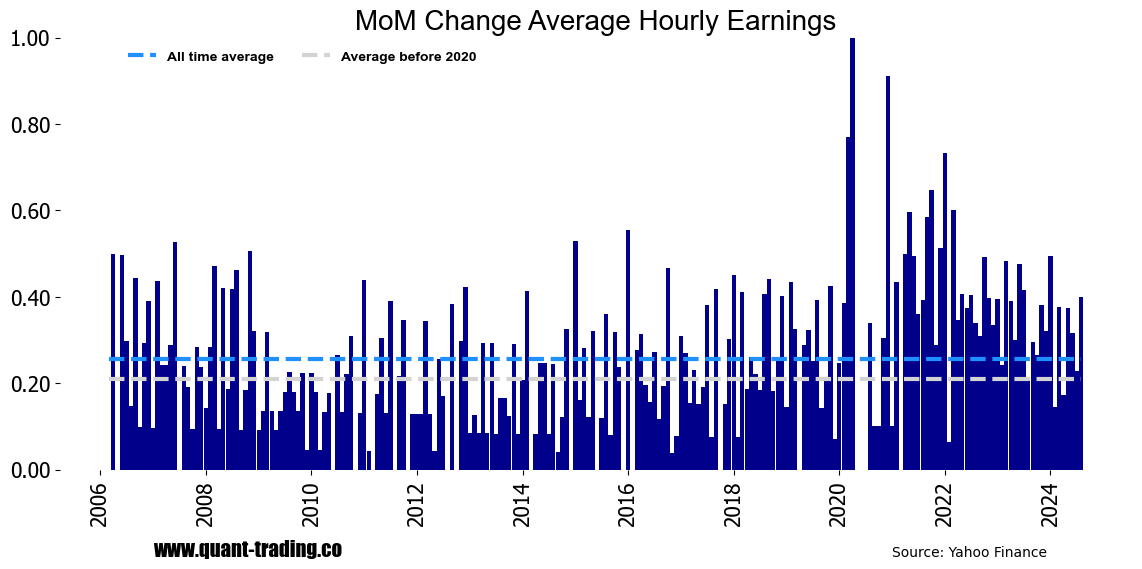

In [43]:
average_hourly_earnings = web.DataReader(['CES0500000003'], 'fred', start, end)
average_hourly_earnings.dropna(inplace=True)
average_hourly_earnings.reset_index(inplace=True)
average_hourly_earnings['DATE'] = pd.to_datetime(average_hourly_earnings['DATE'])
average_hourly_earnings['MoM'] = average_hourly_earnings['CES0500000003']/average_hourly_earnings['CES0500000003'].shift(1)-1
average_hourly_earnings['YoY'] = average_hourly_earnings['CES0500000003']/average_hourly_earnings['CES0500000003'].shift(12)-1

fig = plt.figure()
font = font_manager.FontProperties(family='arial',weight='bold', style='normal', size=10)

MIN_VALUE = np.array([average_hourly_earnings['MoM'].min()])
MAX_VALUE = np.array([average_hourly_earnings['MoM'].max()])
RANGE = MAX_VALUE - MIN_VALUE


mean_monthly_change = average_hourly_earnings['MoM'].mean()*100

mean_monthly_change_before2020 = average_hourly_earnings.loc[average_hourly_earnings['DATE']<datetime.datetime(2019,12,31)]['MoM'].mean()*100

ax1 = fig.add_subplot(1, 1, 1,frameon=False)
ax1.bar(average_hourly_earnings['DATE'],average_hourly_earnings['MoM']*100,color='darkblue',width=np.timedelta64(24*30, 'h'))
ax1.plot(average_hourly_earnings['DATE'],mean_monthly_change*np.ones(average_hourly_earnings.shape[0]),linestyle='dashed', color='dodgerblue',linewidth=3,label='All time average')
ax1.plot(average_hourly_earnings['DATE'],mean_monthly_change_before2020*np.ones(average_hourly_earnings.shape[0]),linestyle='dashed', color='lightgrey',linewidth=3, label='Average before 2020')
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.4, 1.0),ncol=10,markerscale=3)
plt.xticks(rotation=90)
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax1.axis([None, None, 0, 1])
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.title("MoM Change Average Hourly Earnings", size=20, family='Arial')

plt.text(datetime.datetime(2006,12,31), -0.2,'www.quant-trading.co' , color='black', fontsize=15,family='Impact')
plt.text(datetime.datetime(2020,12,31), -0.2,'Source: Yahoo Finance' , color='black', fontsize=10)

plt.subplots_adjust(bottom=0.1, right=1.8, top=1.0)

## **Second principal component : Slope of the yield curve**

<font size="3">We mentioned before that the second principal component closely tracks the slope of the yield curve as is shown in the chat below. Can you find a variable that is closely related to this as we did in the case of the first principal component and inflation?<br><br> 

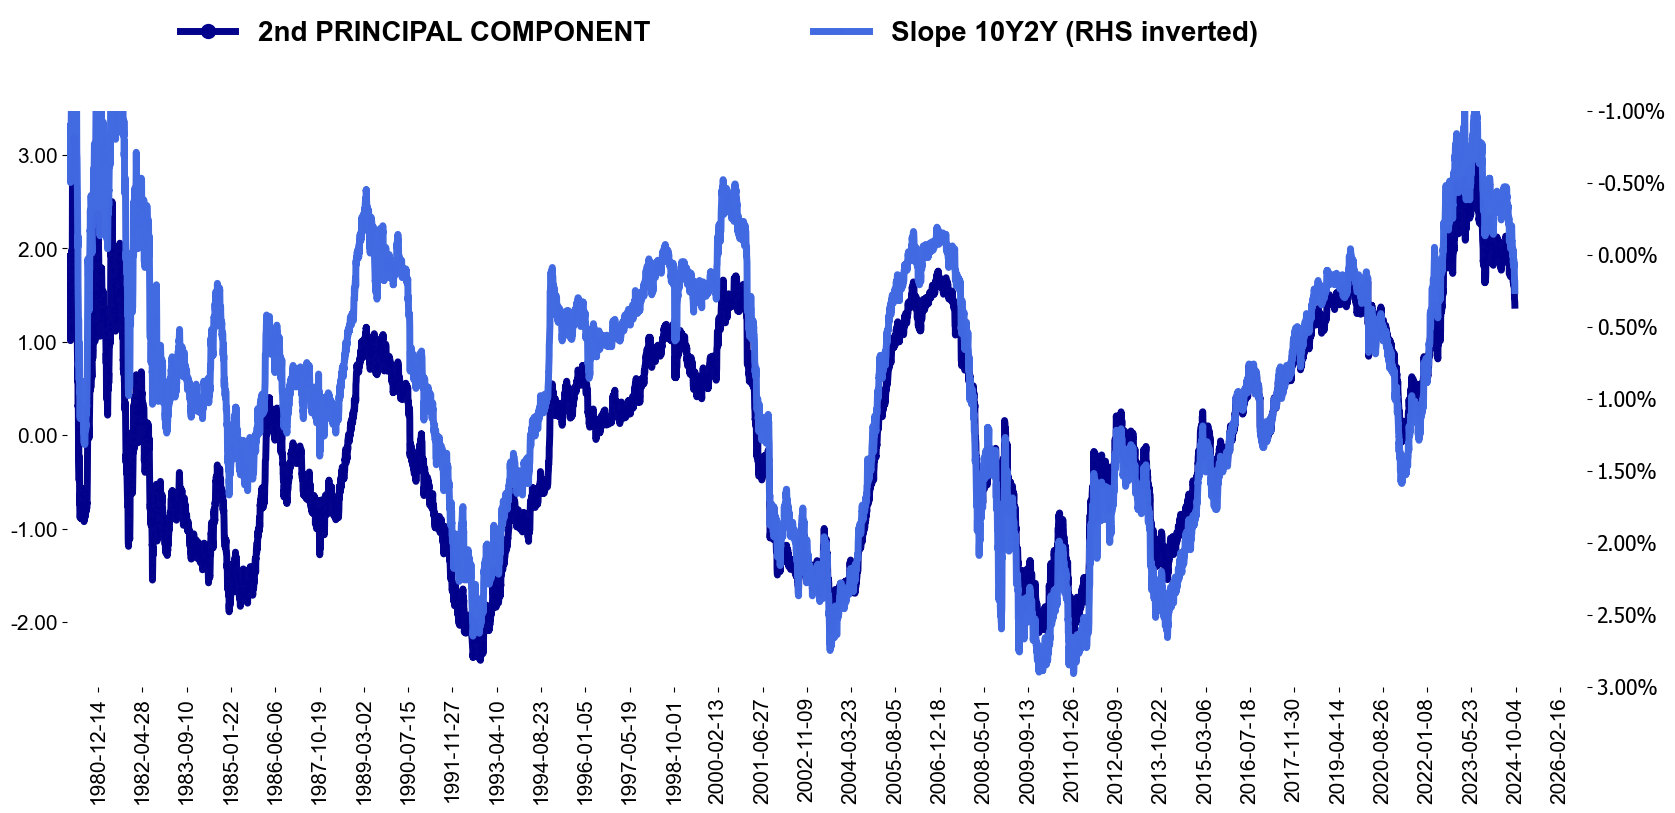

In [44]:
#CHART - ROTATED MATRIX SECOND COLUMN - OFTEN REFERRED TO AS SECOND PRINCIPAL COMPONENT

#Slope - difference between 10 year and 2 year rate
US_Rates['10Yvs2Y'] = US_Rates['DGS10']-US_Rates['DGS2']

font = font_manager.FontProperties(family='arial',weight='bold', style='normal', size=20)
tick_spacing = 500
fig = plt.figure()


#SUBPLOT4
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(df_variables['DATE'],df_variables[1],marker='o', linestyle='solid',linewidth=5,color='darkblue',alpha=0.99,label='2nd PRINCIPAL COMPONENT',markersize=1)
ax1.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.4, 1.2),ncol=10,markerscale=10)
ax1.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.xticks(rotation=90)
plt.yticks(fontname = "Arial",fontsize=15)
plt.xticks(fontname = "Arial",fontsize=15)
ax1.title.set_fontfamily('arial')
ax1.axis([start, None, None, None])
ax1.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
ax1.xaxis.set_major_formatter(formatter)
plt.box(on=None)

ax2 = ax1.twinx()
ax2.plot(US_Rates['DATE'],US_Rates['10Yvs2Y'],marker='o',linestyle='solid',linewidth=5,color='royalblue',alpha=0.99,label='Slope 10Y2Y (RHS inverted)',markersize=1)
ax2.legend(frameon=False,prop=font,loc=1, bbox_to_anchor=(0.8, 1.2),ncol=10,markerscale=3)
ax2.xaxis.set_major_locator(ticker.MultipleLocator(tick_spacing))
plt.yticks(fontname = "Tahoma",fontsize=15)
plt.xticks(fontname = "Tahoma",fontsize=15)
ax2.axis([start, None, 3, -1])
vals = ax2.get_yticks()
ax2.yaxis.set_major_formatter(FormatStrFormatter('%2.2f%%'))
ax2.xaxis.set_major_formatter(formatter)
ax2.set_facecolor('white')
plt.box(on=None)

plt.subplots_adjust(wspace = 0.3,hspace = 0.8,bottom=0.1, right=2.5, top=1.3)

plt.show()

<font size="3"> We hope this content has been useful. If you want to make a donation please click on the button below. It helps us with this website maintenance. 

[![paypal](https://www.paypalobjects.com/en_US/i/btn/btn_donateCC_LG.gif)](https://www.paypal.com/cgi-bin/webscr?cmd=_s-xclick&hosted_button_id=29CVY97MEQ9BY)